<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/UPPER_CONFIDENCE_BOUND_UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az 

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 10541 (delta 25), reused 0 (delta 0), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [4]:
!pip install sklearn

# Upper Confidence Bound (UCB)

# Cómo importar las librerías


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [6]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Ads_CTR_Optimisation.csv')

In [7]:
dataset.head(5)
# esto es un caso de marketing. vemos un total de 10 anuncios por ejemplo de un mismo coche. , se colgaron los anuncios y cada usuario botó cuales le gustaban más o cuales tuvo más click. 
# se fueron mostrando todos los anuncios a cada usuario e hizo click en los que pone 1
# todo son variables independientes. 

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# Algoritmo de UCB

In [15]:
# no hay ningún paquete que lo haga. hay que hacerlo a mano. no siempre tenemos una librería que nos lo haga.
import math
N = 10000 # seleccionamos 10,000 usuarios
d = 10 # posibles anuncios
number_of_selections = [0] * d # tenemos un vector de tamaño d llenos de 0. la primera linea. nos dirá cada vez que se ha seleccionafo
sums_of_rewards = [0] * d # este se calcula igual que el de arriba.
ads_selected = [] # este es el array con los anuncios que van a ser seleccionados. es un vector de 10,000 posiciones. 
total_reward = 0 # recompensa acumulada hasta el momento
for n in range(0, N): # desde la primera ronda hasta la 10,000
    max_upper_bound = 0 # esto nos dice en cada momento cual es el mejor de todos
    ad = 0 # inicializamos ad. 
    for i in range(0, d): # desde el anuncio 0 al 10
        if(number_of_selections[i]>0): # aui decimos que el numero de selecciones tiene que ser mayor que 1. en la primera ronda tomaría el else upper_bound 1 elevado a 400, y así en los primeros 10.
        # duarnte la primera ronda de 10 el mejor sería el 0 que es 1e400. son inguales pero no mejores. 
        # 
            average_reward = sums_of_rewards[i] / number_of_selections[i] # recompensa media, la raya roja que nos pinto en los apuntes.
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i]) # es una formula la raiz duadrada de ..... le sumamos 1 n+1 porque sino en la primera ronda peta. 
            upper_bound = average_reward + delta_i # este el intervalo de confianza superior. 
        else:
            upper_bound = 1e400 # para las primera decisiones el intervalo de confinza es de 1 elevado a 400
            
        if upper_bound > max_upper_bound: # chequea si el de la ronda actual es mayor que el que teníamos. 
            max_upper_bound = upper_bound
            ad = i # cual es es anuncio mejor hasta el momento. 
    # duante las 10 primeras rondas será 0, tenemos que poner una frontera a partir de la cual se empieza a calcular.
    # hasta aquí nos hemos quedado con el emejor de cada ronda. 
    
    ads_selected.append(ad) # aui apendizamos ad en ads_selected
    number_of_selections[ad] = number_of_selections[ad] + 1 # es iguales al anterior + 1
    reward = dataset.values[n, ad] # aui las recompensas, dado el anuncio optimo. será el valor del dataset de la la fila n y la columna ad. 
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward # aqui actualizamos la suma de recompensas. para cada anuncio.
    total_reward = total_reward + reward # esto es el total de recompensas. 

In [13]:
total_reward # esto quiere decir que de todos los usuarios que se les ha mostrado han hecho click 2178 veces. 


2178

In [16]:
sums_of_rewards # estos son las sumas de recompensas de cada anuncio. y vemos que el mejor es 4.

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [11]:
ads_selected # esto quiere decir que anuncio ha sido mostrado. al primer usuario el 0+ 1, al segundo el 1 + 1 es decir el 2
# vemos que los primeros 10 no se repiten hasta el 10, que empieza a cambiar. se van mostrando más los mejores. al final empieza a estabilizarse el 4. 
# es decir lelga un momento que vemos que el mejor anuncio para mostrar el es 4 que será el que elegiremos.
# al tener un presupuesto limitado como vemos con 2178 tenemos el resultado.  

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 0,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 9,
 7,
 0,
 6,
 8,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 9,
 7,
 0,
 0,
 6,
 8,
 4,
 0,
 7,
 1,
 1,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 0,
 0,
 7,
 0,
 4,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 7,
 0,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 0,
 7,
 7,
 4,
 7,
 7,
 7,
 1,
 6,
 8,
 0,
 4,
 4,
 2,
 3,
 5,
 9,
 4,
 7,
 0,
 7,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 8,
 4,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 0,
 6,
 4,
 1,
 1,
 1,
 8,
 7,
 2,
 3,
 5,
 9,
 4,
 0,
 1,
 1,
 1,
 6,
 7,
 8,
 4,
 1,
 2,
 3,
 5,
 9,
 0,
 6,
 7,
 8,
 4,
 7,
 1,
 0,
 6,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 1,
 0,
 6,
 6,
 6,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 7,
 0,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 7,
 4,
 8,
 0,
 7,


# Histograma de resultados

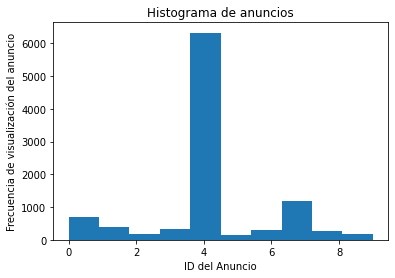

In [9]:
plt.hist(ads_selected) # la variable que metemos es ads_selected
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()